<a href="https://colab.research.google.com/github/lbcarv1972/ICU-Liberation/blob/main/ICU_Liberation_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Drive Assembly***

In [80]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## ***Authenticate user***

In [81]:
from google.colab import auth
auth.authenticate_user()

# **Importing libraries**

In [82]:
import gspread
from google.auth import default
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.formula.api as sm
import re
import numpy as np
import seaborn as sns
from IPython.display import display, HTML

# **Obtaining Credentials**

In [83]:
# Get credentials and authorize using 'default' instead of 'GoogleCredentials'
creds, _ = default()
gc = gspread.authorize(creds)

# **Import from Google Spreadsheet**


In [84]:
# Import from Google Spreadsheet
spreadsheet_id = '1MIQ60QzzUd6JaOgQomSVOtl_yikHh-JPHNu0z5-pLAs'
sheet = gc.open_by_key(spreadsheet_id)

# **Worksheet Definition**


In [85]:
# Worksheet Definition
worksheet = sheet.worksheet('Entradas')

# **Get all data as a list of lists**

In [86]:
# Get all data as a list of lists
data = worksheet.get_all_values()

# **Getting the data as a Pandas DataFrame**




In [87]:
# Getting the data as a Pandas DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# **Creating binary variables according to the Goals**

Descriptive Statistics:
count    2594.000000
mean        0.979568
std         0.141499
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Cabeceira_elevada_Target, dtype: float64

Frequency:
Cabeceira_elevada_Target
1    2541
0      53
Name: count, dtype: int64


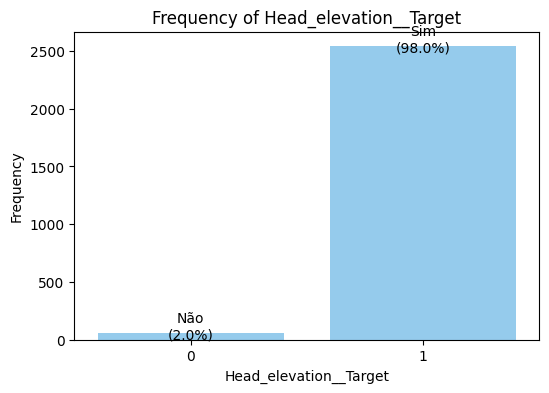

In [88]:
# Create a new binary variable 'Head_elevation__Target'
df['Cabeceira_elevada_Target'] = df['Cabeceira_elevada'].apply(lambda x: 1 if x == 'Sim' else 0)

# Calculate descriptive statistics
cabeceira_elevada_stats = df['Cabeceira_elevada_Target'].describe()

# Calculate the frequency of each value (0 and 1)
cabeceira_elevada_freq = df['Cabeceira_elevada_Target'].value_counts()

# Print the results
print("Descriptive Statistics:")
print(cabeceira_elevada_stats)

print("\nFrequency:")
print(cabeceira_elevada_freq)

# Create the graph
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Cabeceira_elevada_Target', data=df, color='lightskyblue')

# Add percentages as "Sim" or "Não" above the bars
for i, p in enumerate(ax.patches):  # Use enumerate to get index
    height = p.get_height()
    percentage = (height / len(df)) * 100

    # Custom labels with "Sim" or "Não":
    label = f'{percentage:.1f}%'
    if i == 0:  # Use index (i) to identify the bar
        label = f'Não\n({label})'
    else:
        label = f'Sim\n({label})'

    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Frequency of Head_elevation__Target')
plt.xlabel('Head_elevation__Target')
plt.ylabel('Frequency')
plt.show()

Descriptive Statistics:
count    2594.000000
mean        0.942174
std         0.233459
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Protocolo_glicemico_Target, dtype: float64

Frequency:
Protocolo_glicemico_Target
1    2444
0     150
Name: count, dtype: int64


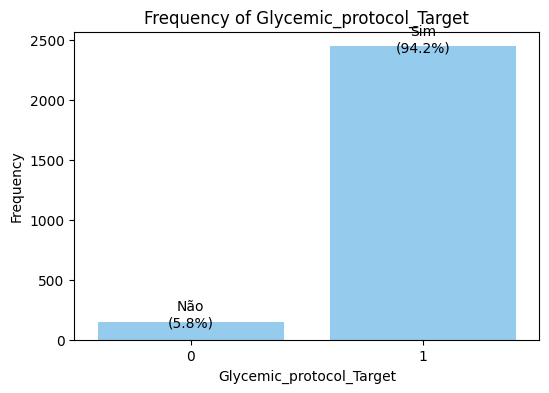

In [89]:
# Create a new binary variable 'Glycemic_protocol_Target'
df['Protocolo_glicemico_Target'] = df['Protocolo_glicemico'].apply(lambda x: 1 if x == 'Sim' else 0)

# Calculate descriptive statistics
cabeceira_elevada_stats = df['Protocolo_glicemico_Target'].describe()

# Calculate the frequency of each value (0 and 1)
cabeceira_elevada_freq = df['Protocolo_glicemico_Target'].value_counts()

# Print the results
print("Descriptive Statistics:")
print(cabeceira_elevada_stats)

print("\nFrequency:")
print(cabeceira_elevada_freq)

# Create the graph
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Protocolo_glicemico_Target', data=df, color='lightskyblue')

# Add percentages as "Sim" or "Não" above the bars
for i, p in enumerate(ax.patches):  # Use enumerate to get index
    height = p.get_height()
    percentage = (height / len(df)) * 100

    # Custom labels with "Sim" or "Não":
    label = f'{percentage:.1f}%'
    if i == 0:  # Use index (i) to identify the bar
        label = f'Não\n({label})'
    else:
        label = f'Sim\n({label})'

    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Frequency of Glycemic_protocol_Target')
plt.xlabel('Glycemic_protocol_Target')
plt.ylabel('Frequency')
plt.show()

Descriptive Statistics:
count    2594.000000
mean        0.950270
std         0.217429
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Prevencao_gastrite_Target, dtype: float64

Frequency:
Prevencao_gastrite_Target
1    2465
0     129
Name: count, dtype: int64


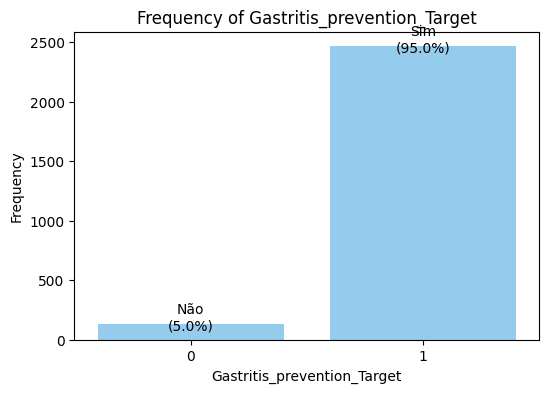

In [90]:
# Assume all answers except 'No' as a goal for Gastritis Prevention
# Create a new binary variable 'Gastritis_prevention_Target'
df['Prevencao_gastrite_Target'] = df['Prevenção_gastrite'].apply(lambda x: 1 if x != 'Não' else 0)

# Calculate descriptive statistics
cabeceira_elevada_stats = df['Prevencao_gastrite_Target'].describe()

# Calculate the frequency of each value (0 and 1)
cabeceira_elevada_freq = df['Prevencao_gastrite_Target'].value_counts()

# Print the results
print("Descriptive Statistics:")
print(cabeceira_elevada_stats)

print("\nFrequency:")
print(cabeceira_elevada_freq)

# Create the graph
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Prevencao_gastrite_Target', data=df, color='lightskyblue')

# Add percentages as "Sim" or "Não" above the bars
for i, p in enumerate(ax.patches):  # Use enumerate to get index
    height = p.get_height()
    percentage = (height / len(df)) * 100

    # Custom labels with "Sim" or "Não":
    label = f'{percentage:.1f}%'
    if i == 0:  # Use index (i) to identify the bar
        label = f'Não\n({label})'
    else:
        label = f'Sim\n({label})'

    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Frequency of Gastritis_prevention_Target')
plt.xlabel('Gastritis_prevention_Target')
plt.ylabel('Frequency')
plt.show()



Descriptive Statistics:
count    2594.000000
mean        0.949499
std         0.219019
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Prevencao_TEV_Target, dtype: float64

Frequency:
Prevencao_TEV_Target
1    2463
0     131
Name: count, dtype: int64


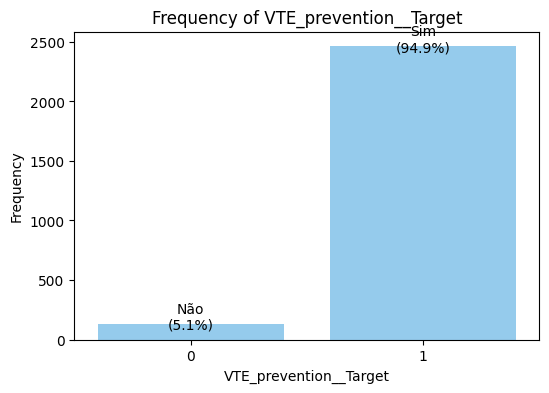

In [91]:
# Assume all answers except 'No' as a goal for VTE Prevention

# Create a new binary variable 'VTE_prevention__Target'
df['Prevencao_TEV_Target'] = df['Prevenção_TEV'].apply(lambda x: 1 if x != 'Não' else 0)

# Calculate descriptive statistics
prevencao_tev_stats = df['Prevencao_TEV_Target'].describe()

# Calculate the frequency of each value (0 and 1)
prevencao_tev_freq = df['Prevencao_TEV_Target'].value_counts()

# Print the results
print("Descriptive Statistics:")
print(prevencao_tev_stats)

print("\nFrequency:")
print(prevencao_tev_freq)

# Create the graph
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Prevencao_TEV_Target', data=df, color='lightskyblue')

# Add percentages as "Sim" or "Não" above the bars
for i, p in enumerate(ax.patches):  # Use enumerate to get index
    height = p.get_height()
    percentage = (height / len(df)) * 100

    # Custom labels with "Sim" or "Não":
    label = f'{percentage:.1f}%'
    if i == 0:  # Use index (i) to identify the bar
        label = f'Não\n({label})'
    else:
        label = f'Sim\n({label})'

    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Frequency of VTE_prevention__Target')
plt.xlabel('VTE_prevention__Target')
plt.ylabel('Frequency')
plt.show()

Descriptive Statistics:
count    2594.000000
mean        0.719738
std         0.449214
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Dieta_Target, dtype: float64

Frequency:
Dieta_Target
1    1867
0     727
Name: count, dtype: int64


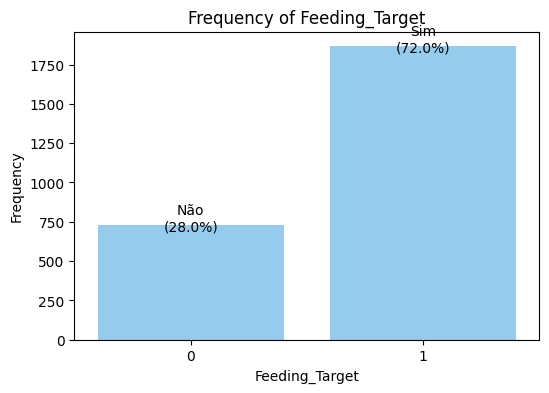

In [92]:
# Assume all the answers except 'No' as your Feeding goal

# Create a new binary variable 'Feeding_Target'
df['Dieta_Target'] = df['Dieta'].apply(lambda x: 1 if x != 'Não' else 0)

# Calculate descriptive statistics
dieta_target_stats = df['Dieta_Target'].describe()

# Calculate the frequency of each value (0 and 1)
dieta_target_freq = df['Dieta_Target'].value_counts()

# Print the results
print("Descriptive Statistics:")
print(dieta_target_stats)

print("\nFrequency:")
print(dieta_target_freq)

# Create the graph
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Dieta_Target', data=df, color='lightskyblue')

# Add percentages as "Sim" or "Não" above the bars
for i, p in enumerate(ax.patches):  # Use enumerate to get index
    height = p.get_height()
    percentage = (height / len(df)) * 100

    # Custom labels with "Sim" or "Não":
    label = f'{percentage:.1f}%'
    if i == 0:  # Use index (i) to identify the bar
        label = f'Não\n({label})'
    else:
        label = f'Sim\n({label})'

    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Frequency of Feeding_Target')
plt.xlabel('Feeding_Target')
plt.ylabel('Frequency')
plt.show()

Descriptive Statistics:
count    2594.000000
mean        0.685428
std         0.464435
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Sondagem_vesical_Target, dtype: float64

Frequency:
Sondagem_vesical_Target
1    1778
0     816
Name: count, dtype: int64


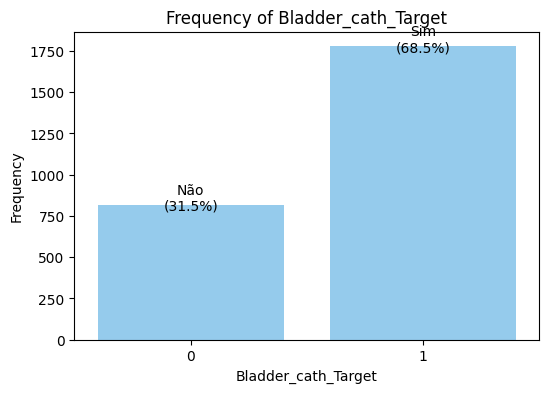

In [93]:
# Assume the answer 'No' as a goal for Bladder Catheterization

# Create a new binary variable 'Bladder_cath_Target'
df['Sondagem_vesical_Target'] = df['Sondagem_vesical'].apply(lambda x: 1 if x == 'Não' else 0)

# Calculate descriptive statistics
sondagem_target_stats = df['Sondagem_vesical_Target'].describe()

# Calculate the frequency of each value (0 and 1)
sondagem_target_freq = df['Sondagem_vesical_Target'].value_counts()

# Print the results
print("Descriptive Statistics:")
print(sondagem_target_stats)

print("\nFrequency:")
print(sondagem_target_freq)

# Create the graph
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Sondagem_vesical_Target', data=df, color='lightskyblue')

# Add percentages as "Sim" or "Não" above the bars
for i, p in enumerate(ax.patches):  # Use enumerate to get index
    height = p.get_height()
    percentage = (height / len(df)) * 100

    # Custom labels with "Sim" or "Não":
    label = f'{percentage:.1f}%'
    if i == 0:  # Use index (i) to identify the bar
        label = f'Não\n({label})'
    else:
        label = f'Sim\n({label})'

    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Frequency of Bladder_cath_Target')
plt.xlabel('Bladder_cath_Target')
plt.ylabel('Frequency')
plt.show()

Descriptive Statistics:
count    2594.000000
mean        0.542406
std         0.498295
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: END_Target, dtype: float64

Frequency:
END_Target
1    1407
0    1187
Name: count, dtype: int64


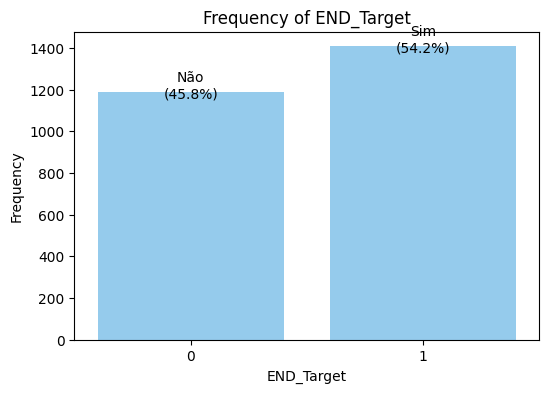

In [94]:
# Assume the target for END is the answer 0 to 3

# Convert the "END" column to numeric, handling errors like NaN
df['END'] = pd.to_numeric(df['END'], errors='coerce')

# Create a new binary variable 'END_Target'
df['END_Target'] = df['END'].apply(lambda x: 1 if 0 <= x <= 3 else 0)

# Calculate descriptive statistics
end_target_stats = df['END_Target'].describe()

# Calculate the frequency of each value (0 and 1)
end_target_freq = df['END_Target'].value_counts()

# Print the results
print("Descriptive Statistics:")
print(end_target_stats)

print("\nFrequency:")
print(end_target_freq)

# Create the graph
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='END_Target', data=df, color='lightskyblue')

# Add percentages as "Sim" or "Não" above the bars
for i, p in enumerate(ax.patches):  # Use enumerate to get index
    height = p.get_height()
    percentage = (height / len(df)) * 100

    # Custom labels with "Sim" or "Não":
    label = f'{percentage:.1f}%'
    if i == 0:  # Use index (i) to identify the bar
        label = f'Não\n({label})'
    else:
        label = f'Sim\n({label})'

    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Frequency of END_Target')
plt.xlabel('END_Target')
plt.ylabel('Frequency')
plt.show()

Descriptive Statistics:
count    2594.000000
mean        0.378566
std         0.485123
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: BPS_Target, dtype: float64

Frequency:
BPS_Target
0    1612
1     982
Name: count, dtype: int64


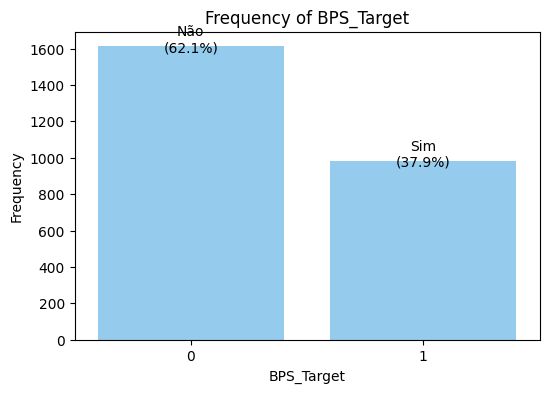

In [95]:
# Assume answer 3 as the goal for BPS

# Convert the "BPS" column to numeric, handling errors like NaN
df['BPS'] = pd.to_numeric(df['BPS'], errors='coerce')


# Create a new binary variable 'BPS_Target'
df['BPS_Target'] = df['BPS'].apply(lambda x: 1 if x == 3 else 0)

# Calculate descriptive statistics
BPS_target_stats = df['BPS_Target'].describe()

# Calculate the frequency of each value (0 and 1)
BPS_target_freq = df['BPS_Target'].value_counts()

# Print the results
print("Descriptive Statistics:")
print(BPS_target_stats)

print("\nFrequency:")
print(BPS_target_freq)

# Create the graph
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='BPS_Target', data=df, color='lightskyblue')

# Add percentages as "Sim" or "Não" above the bars
for i, p in enumerate(ax.patches):  # Use enumerate to get index
    height = p.get_height()
    percentage = (height / len(df)) * 100

    # Custom labels with "Sim" or "Não":
    label = f'{percentage:.1f}%'
    if i == 0:  # Use index (i) to identify the bar
        label = f'Não\n({label})'
    else:
        label = f'Sim\n({label})'

    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Frequency of BPS_Target')
plt.xlabel('BPS_Target')
plt.ylabel('Frequency')
plt.show()


Descriptive Statistics:
count    2594.000000
mean        0.599075
std         0.490180
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: RASS_Target, dtype: float64

Frequency:
RASS_Target
1    1554
0    1040
Name: count, dtype: int64


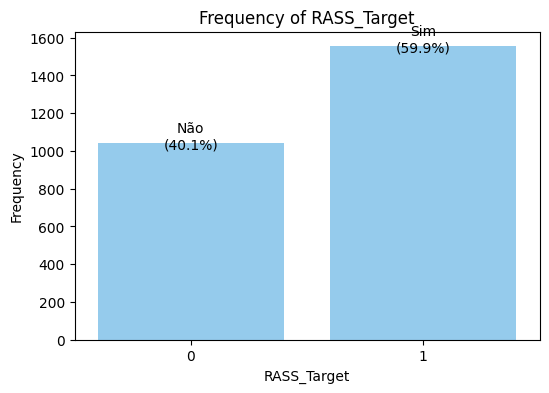

In [96]:
# Assume the target response for RASS is 0 and -1

# Convert the "RASS" column to numeric, handling errors like NaN
df['RASS'] = pd.to_numeric(df['RASS'], errors='coerce')

# Create a new binary variable 'RASS_Target'
df['RASS_Target'] = df['RASS'].apply(lambda x: 1 if x in [0, -1] else 0)

# Calculate descriptive statistics
rass_target_stats = df['RASS_Target'].describe()

# Calculate the frequency of each value (0 and 1)
rass_target_freq = df['RASS_Target'].value_counts()

# Print the results
print("Descriptive Statistics:")
print(rass_target_stats)

print("\nFrequency:")
print(rass_target_freq)

# Create the graph
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='RASS_Target', data=df, color='lightskyblue')

# Add percentages as "Sim" or "Não" above the bars
for i, p in enumerate(ax.patches):  # Use enumerate to get index
    height = p.get_height()
    percentage = (height / len(df)) * 100

    # Custom labels with "Sim" or "Não":
    label = f'{percentage:.1f}%'
    if i == 0:  # Use index (i) to identify the bar
        label = f'Não\n({label})'
    else:
        label = f'Sim\n({label})'

    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Frequency of RASS_Target')
plt.xlabel('RASS_Target')
plt.ylabel('Frequency')
plt.show()


Descriptive Statistics:
count    2594.000000
mean        0.392059
std         0.488304
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: CAM_ICU_Target, dtype: float64

Frequency:
CAM_ICU_Target
0    1577
1    1017
Name: count, dtype: int64


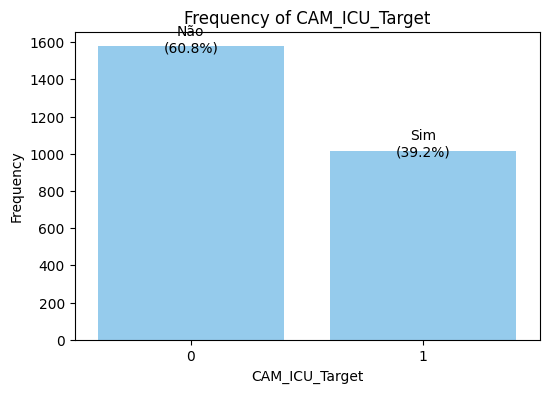

In [97]:
# Assume the Negative response as a goal for CAM-ICU

# Create a new binary variable 'CAM_ICU_Target'
df['CAM_ICU_Target'] = df['CAM-ICU'].apply(lambda x: 1 if x == 'Negativo' else 0)

# Calculate descriptive statistics
cam_icu_target_stats = df['CAM_ICU_Target'].describe()

# Calculate the frequency of each value (0 and 1)
cam_icu_target_freq = df['CAM_ICU_Target'].value_counts()

# Print the results
print("Descriptive Statistics:")
print(cam_icu_target_stats)

print("\nFrequency:")
print(cam_icu_target_freq)

# Create the graph
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='CAM_ICU_Target', data=df, color='lightskyblue')

# Add percentages as "Sim" or "Não" above the bars
for i, p in enumerate(ax.patches):  # Use enumerate to get index
    height = p.get_height()
    percentage = (height / len(df)) * 100

    # Custom labels with "Sim" or "Não":
    label = f'{percentage:.1f}%'
    if i == 0:  # Use index (i) to identify the bar
        label = f'Não\n({label})'
    else:
        label = f'Sim\n({label})'

    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Frequency of CAM_ICU_Target')
plt.xlabel('CAM_ICU_Target')
plt.ylabel('Frequency')
plt.show()




Descriptive Statistics:
count    2594.000000
mean        0.686970
std         0.463816
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Analgesico_sedativo_Target, dtype: float64

Frequency:
Analgesico_sedativo_Target
1    1782
0     812
Name: count, dtype: int64


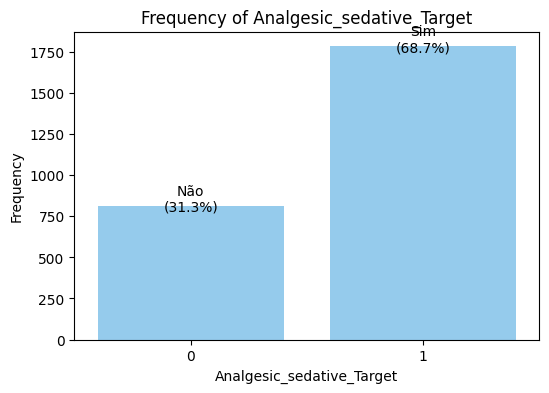

In [98]:
# Assume as a goal for Analgesic/sedative all the answers except Continuous

# Create a new binary variable 'Analgesic_sedative_Target'
df['Analgesico_sedativo_Target'] = df['Analgésico_sedativo'].apply(lambda x: 1 if x != 'Contínuo' else 0)

# Calculate descriptive statistics
analgesico_target_stats = df['Analgesico_sedativo_Target'].describe()

# Calculate the frequency of each value (0 and 1)
analgesico_target_freq = df['Analgesico_sedativo_Target'].value_counts()

# Print the results
print("Descriptive Statistics:")
print(analgesico_target_stats)

print("\nFrequency:")
print(analgesico_target_freq)

# Create the graph
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Analgesico_sedativo_Target', data=df, color='lightskyblue')

# Add percentages as "Sim" or "Não" above the bars
for i, p in enumerate(ax.patches):  # Use enumerate to get index
    height = p.get_height()
    percentage = (height / len(df)) * 100

    # Custom labels with "Sim" or "Não":
    label = f'{percentage:.1f}%'
    if i == 0:  # Use index (i) to identify the bar
        label = f'Não\n({label})'
    else:
        label = f'Sim\n({label})'

    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Frequency of Analgesic_sedative_Target')
plt.xlabel('Analgesic_sedative_Target')
plt.ylabel('Frequency')
plt.show()

Descriptive Statistics:
count    2594.000000
mean        0.203161
std         0.402429
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TDE_Target, dtype: float64

Frequency:
TDE_Target
0    2067
1     527
Name: count, dtype: int64


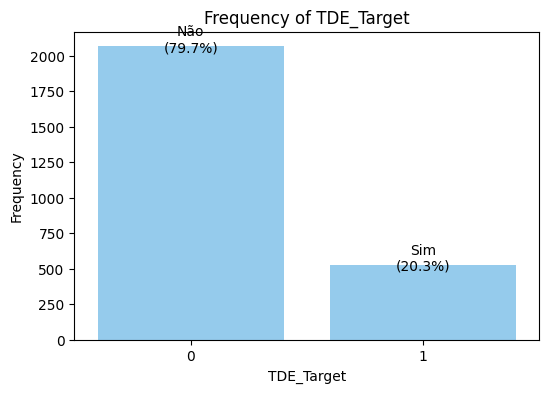

In [99]:
# Assume the answer Yes as your goal for TDE

# Create a new binary variable 'TDE_Target'
df['TDE_Target'] = df['TDE'].apply(lambda x: 1 if x == 'Sim' else 0)

# Calculate descriptive statistics
tde_target_stats = df['TDE_Target'].describe()

# Calculate the frequency of each value (0 and 1)
tde_target_freq = df['TDE_Target'].value_counts()

# Print the results
print("Descriptive Statistics:")
print(tde_target_stats)

print("\nFrequency:")
print(tde_target_freq)

# Create the graph
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='TDE_Target', data=df, color='lightskyblue')

# Add percentages as "Sim" or "Não" above the bars
for i, p in enumerate(ax.patches):  # Use enumerate to get index
    height = p.get_height()
    percentage = (height / len(df)) * 100

    # Custom labels with "Sim" or "Não":
    label = f'{percentage:.1f}%'
    if i == 0:  # Use index (i) to identify the bar
        label = f'Não\n({label})'
    else:
        label = f'Sim\n({label})'

    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Frequency of TDE_Target')
plt.xlabel('TDE_Target')
plt.ylabel('Frequency')
plt.show()

Descriptive Statistics:
count    2594.000000
mean        0.117965
std         0.322628
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TRE_Target, dtype: float64

Frequency:
TRE_Target
0    2288
1     306
Name: count, dtype: int64


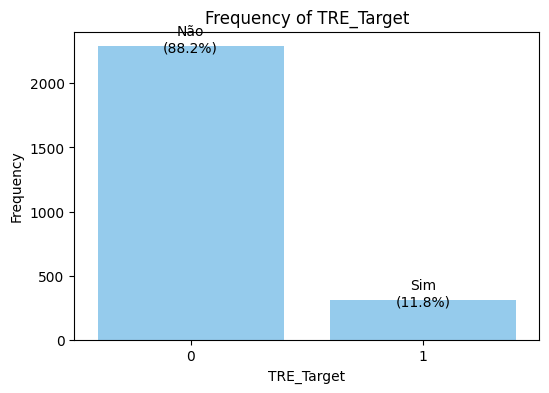

In [100]:
# Assume the answer Yes as your goal for TRE

# Create a new binary variable 'TRE_Target'
df['TRE_Target'] = df['TRE'].apply(lambda x: 1 if x == 'Sim' else 0)

# Calculate descriptive statistics
tre_target_stats = df['TRE_Target'].describe()

# Calculate the frequency of each value (0 and 1)
tre_target_freq = df['TRE_Target'].value_counts()

# Print the results
print("Descriptive Statistics:")
print(tre_target_stats)

print("\nFrequency:")
print(tre_target_freq)

# Create the graph
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='TRE_Target', data=df, color='lightskyblue')

# Add percentages as "Sim" or "Não" above the bars
for i, p in enumerate(ax.patches):  # Use enumerate to get index
    height = p.get_height()
    percentage = (height / len(df)) * 100

    # Custom labels with "Sim" or "Não":
    label = f'{percentage:.1f}%'
    if i == 0:  # Use index (i) to identify the bar
        label = f'Não\n({label})'
    else:
        label = f'Sim\n({label})'

    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Frequency of TRE_Target')
plt.xlabel('TRE_Target')
plt.ylabel('Frequency')
plt.show()

Descriptive Statistics:
count    2594.000000
mean        0.606785
std         0.488558
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Mobilizacao_Target, dtype: float64

Frequency:
Mobilizacao_Target
1    1574
0    1020
Name: count, dtype: int64


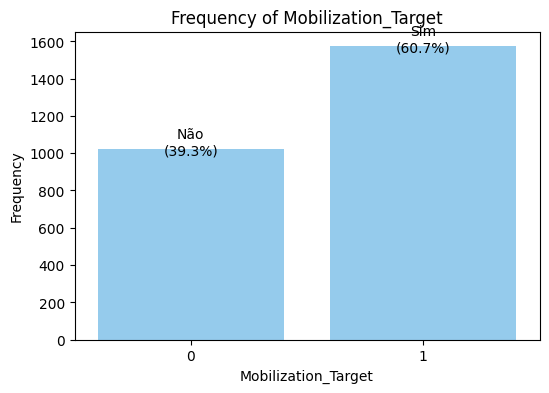

In [101]:
# Assume all answers except 1 as a goal for Mobilization

# Create a new binary variable 'Mobilization_Target'
df['Mobilizacao_Target'] = df['Mobilização'].apply(lambda x: 1 if x != '1' else 0)

# Calculate descriptive statistics
mobilização_target_stats = df['Mobilizacao_Target'].describe()

# Calculate the frequency of each value (0 and 1)
mobilização_target_freq = df['Mobilizacao_Target'].value_counts()

# Print the results
print("Descriptive Statistics:")
print(mobilização_target_stats)

print("\nFrequency:")
print(mobilização_target_freq)

# Create the graph
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Mobilizacao_Target', data=df, color='lightskyblue')

# Add percentages as "Sim" or "Não" above the bars
for i, p in enumerate(ax.patches):  # Use enumerate to get index
    height = p.get_height()
    percentage = (height / len(df)) * 100

    # Custom labels with "Sim" or "Não":
    label = f'{percentage:.1f}%'
    if i == 0:  # Use index (i) to identify the bar
        label = f'Não\n({label})'
    else:
        label = f'Sim\n({label})'

    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Frequency of Mobilization_Target')
plt.xlabel('Mobilization_Target')
plt.ylabel('Frequency')
plt.show()

# **Open Outcomes spreadsheet**

In [102]:
# Open Outcomes spreadsheet
worksheet = sheet.worksheet('Desfechos')

# Use 'worksheet' to access data from the "Outcomes" sheet
data = worksheet.get_all_values()

# Create a Pandas DataFrame
df_geral = pd.DataFrame(data[1:], columns=data[0])


In [103]:
# Convert 'Date' in 'Outcomes' to 'Month_Year'

# Convert 'Date' to datetime in df_geral, handling errors like NaT
df_geral['Data'] = pd.to_datetime(df_geral['Data'], format='%d/%m/%Y', errors='coerce')

# Create 'Mes_Ano' in df_geral, treating NaT as blank values
df_geral['Mes_Ano'] = df_geral['Data'].dt.strftime('%B-%Y')

# --- Ensure 'Mes_Ano' exists in df (Entradas) ---
# Extract month and year from 'Data' in df (Entradas) if 'Mes_Ano' doesn't exist
if 'Mes_Ano' not in df.columns:
    df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')  # Convert to datetime
    df['Mes_Ano'] = df['Data'].dt.strftime('%B-%Y')

In [104]:
# Convert columns to float, excluding 'Data' and 'Mes_Ano'
for column in df_geral.columns:
    if column not in ['Data', 'Mes_Ano']:
        df_geral[column] = pd.to_numeric(df_geral[column], errors='coerce').astype(float)

In [105]:
# Select all columns except 'Date' and 'Month_Year', and with non-empty names
columns_to_plot = [col for col in df_geral.columns if col not in ['Data', 'Mes_Ano'] and col]

In [106]:
# Create the graphs

# Select all columns except 'Data' and 'Mes_Ano' and with non-empty names
columns_to_plot = [col for col in df_geral.columns if col not in ['Data', 'Mes_Ano'] and col]
# You can now use columns_to_plot for further analysis or plotting
print(columns_to_plot)  # Print the selected columns

['Score_SAPS', 'Mortalidade_Observada_Esperada', 'Total_de_Admissões', 'Total_de_Óbitos', 'Giro_de_Leito', 'Tempo_de_Permanência_DRG', 'Saídas_Hospitalares', 'Dias_de_Ventilação_Mecânica', 'Dias_de_UTI', 'Extubação', 'Dias_Traqueostomia', 'Falha_de_Extubação_e_Reintubação', 'Dias_Livres_de_Ventilação_Mecânica', 'Dias_Livre_de_Delirium']


In [107]:
# Merge Input and Outcome data

# Merge df (Entradas) and df_geral using 'Mes_Ano' as the key
merged_df = pd.merge(df, df_geral, on='Mes_Ano', how='left')

In [108]:
# Ensure 'Mes_Ano' is in the DataFrame and is a string type
if 'Mes_Ano' not in df_geral.columns:
    print("Warning: 'Mes_Ano' column not found in df_geral. Cannot create plots.")
else:
    df_geral['Mes_Ano'] = df_geral['Mes_Ano'].astype(str)

In [109]:
# Select all columns except 'Data' and 'Mes_Ano' e com dados NaN
columns_to_exclude = ['Data', 'Mes_Ano']
columns_blank_or_nan = [col for col in df_geral.columns
                        if col not in columns_to_exclude and
                        (df_geral[col].isnull().all() or df_geral[col].eq('').all())]
print(columns_blank_or_nan)

df_geral = df_geral.drop(columns=columns_blank_or_nan)

# Update columns_to_plot after dropping blank/NaN columns
columns_to_plot = [col for col in df_geral.columns if col not in ['Data', 'Mes_Ano'] and col]
print(columns_to_plot)

['', 'Dias_de_Ventilação_Mecânica', 'Dias_de_UTI', 'Extubação', 'Dias_Traqueostomia', 'Falha_de_Extubação_e_Reintubação', 'Dias_Livres_de_Ventilação_Mecânica', 'Dias_Livre_de_Delirium']
['Score_SAPS', 'Mortalidade_Observada_Esperada', 'Total_de_Admissões', 'Total_de_Óbitos', 'Giro_de_Leito', 'Tempo_de_Permanência_DRG', 'Saídas_Hospitalares']


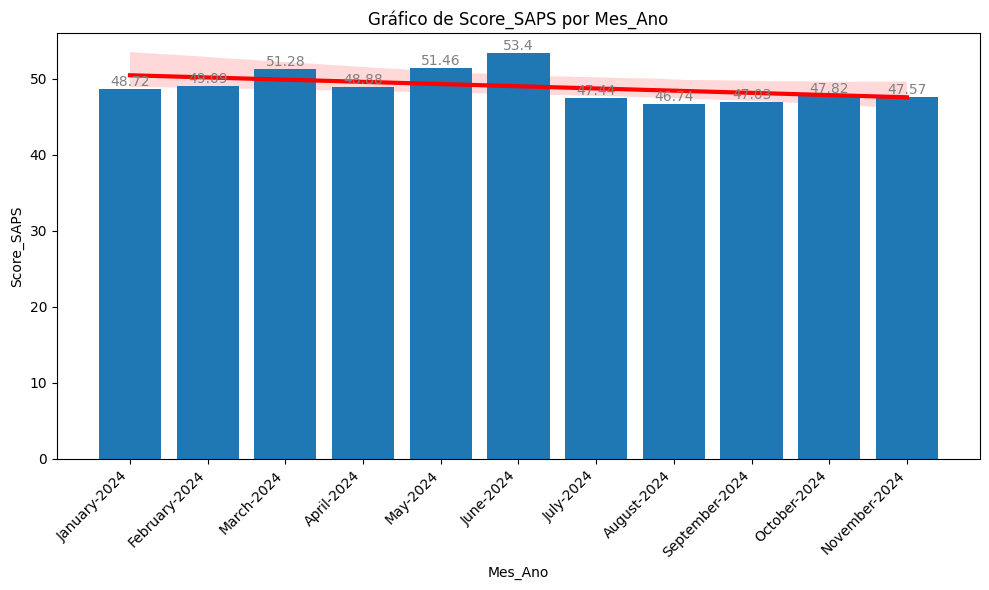

<Figure size 640x480 with 0 Axes>

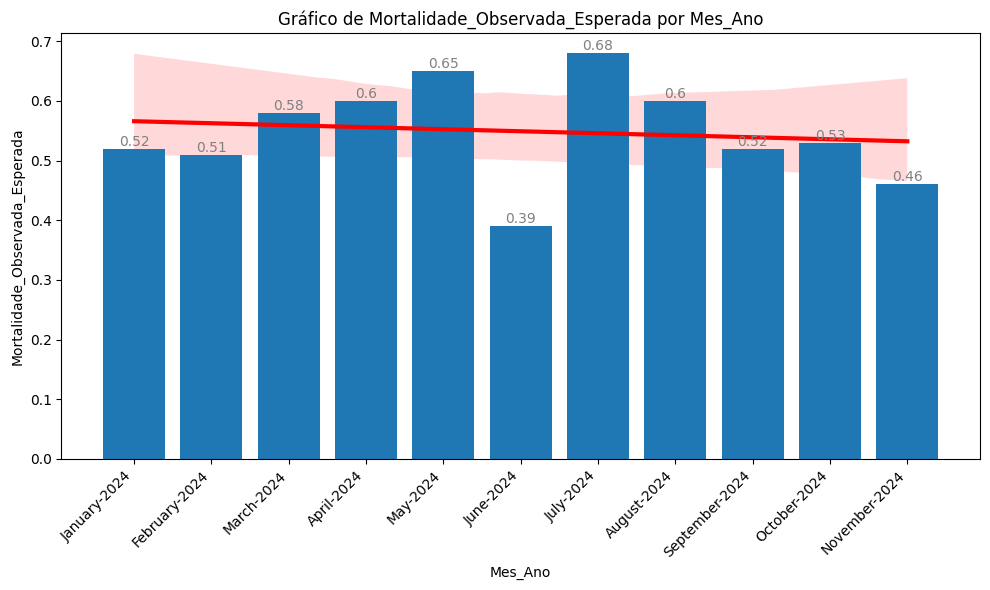

<Figure size 640x480 with 0 Axes>

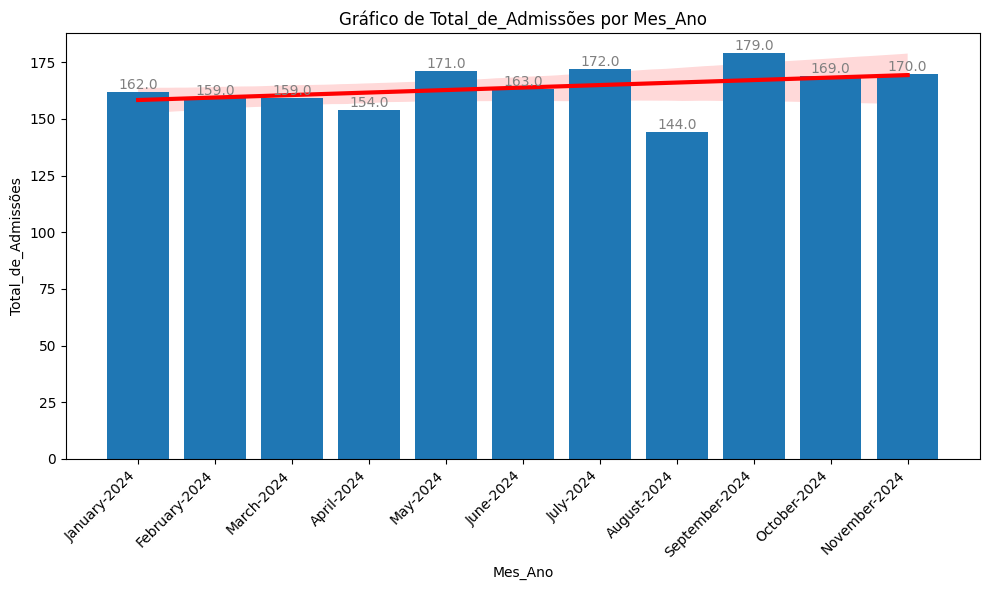

<Figure size 640x480 with 0 Axes>

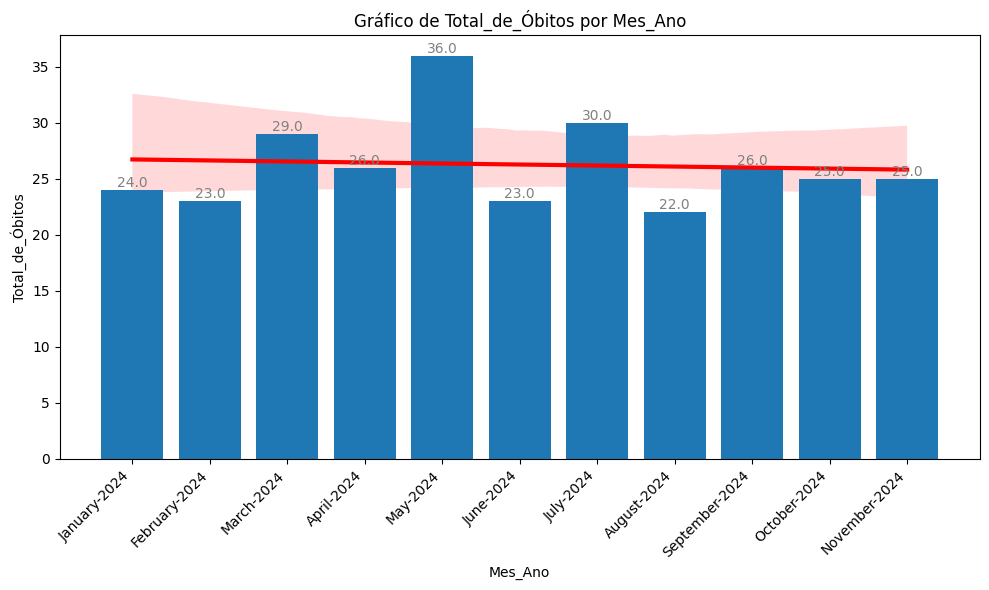

<Figure size 640x480 with 0 Axes>

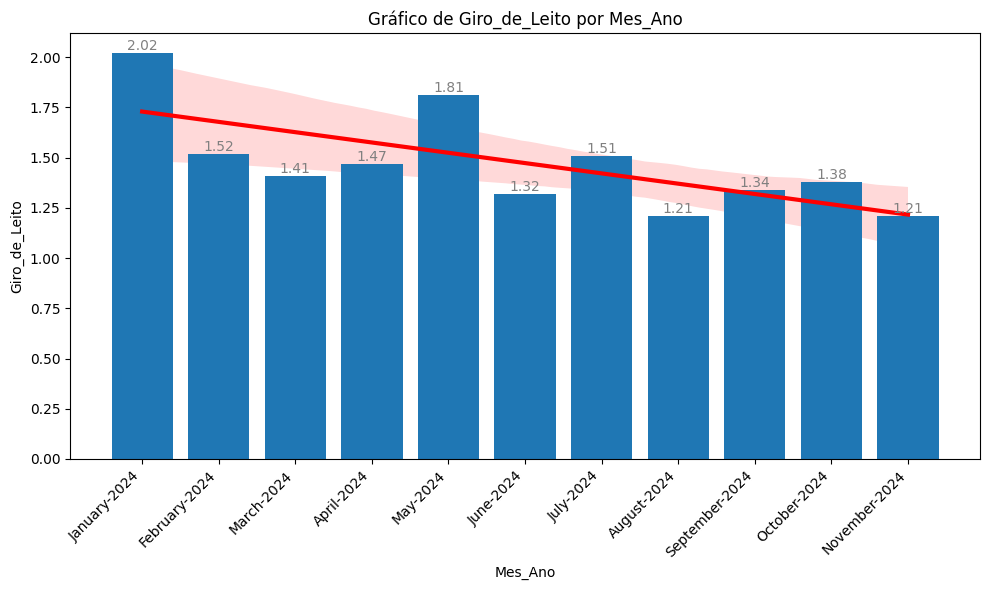

<Figure size 640x480 with 0 Axes>

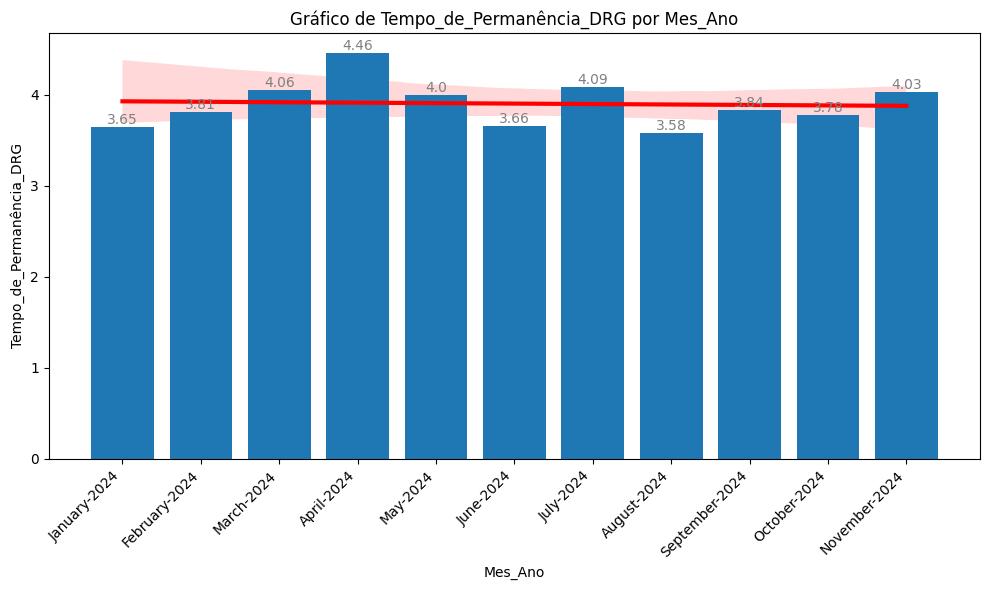

<Figure size 640x480 with 0 Axes>

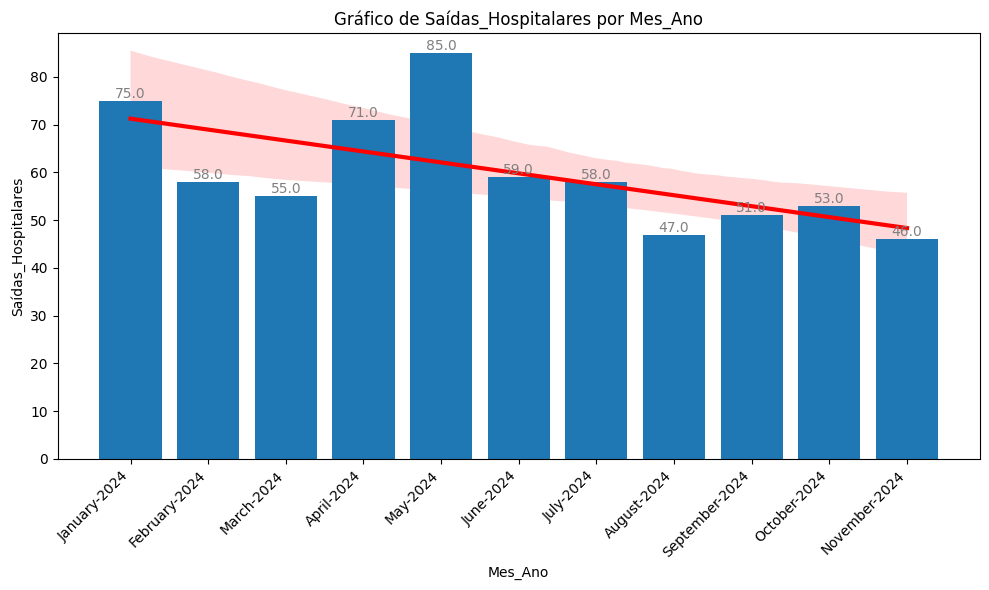

<Figure size 640x480 with 0 Axes>

In [110]:
# Create the 'Outcomes' column charts with 'Month_Year' on the x-axis and the other variables on the Y-axes
import matplotlib.pyplot as plt
import seaborn as sns

for column in columns_to_plot:
    # Create a bar chart for each column
    plt.figure(figsize=(10, 6))

    # Add the trend line with seaborn
    sns.regplot(x=df_geral.index, y=df_geral[column], color='red', scatter=False, line_kws={'linewidth': 3})

    # Create the bar chart and get the bar objects
    bars = plt.bar(df_geral['Mes_Ano'], df_geral[column])

    # Add values on top of the bars in gray color
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='gray')

    plt.xlabel('Mes_Ano')
    plt.ylabel(column)
    plt.title(f'Gráfico de {column} por Mes_Ano')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Save the figure as a PNG file
    plt.savefig(f'grafico_{column}.png')


In [111]:
# Perform variance assessment of 'Outcomes' with 'Month_Year'

# Convert 'Month_Year' to categorical:
df_geral['Mes_Ano'] = pd.Categorical(df_geral['Mes_Ano'])


# Convert columns to numeric:
for column in df_geral.columns:
    if column not in ['Data', 'Mes_Ano']:
        df_geral[column] = pd.to_numeric(df_geral[column], errors='coerce')
# Get numeric columns, excluding 'Data' and empty strings
numeric_columns = [col for col in df_geral.select_dtypes(include=np.number).columns
                   if col != 'Data' and not df_geral[col].isnull().all()]

# Rename the variables in numeric_columns
numeric_columns = [re.sub(r'\s+', '_', col) for col in numeric_columns]
numeric_columns = [re.sub(r'/', '_', col) for col in numeric_columns]

# Update the columns in the DataFrame df_geral
df_geral.columns = [re.sub(r'\s+', '_', col) for col in df_geral.columns]

print(numeric_columns)
print(merged_df.columns)

# Check each of the binary Input variables of 'Inputs' and their relationship with the Output variables of 'Outcomes'

# Get binary input variables from 'Entradas'
binary_input_vars = [col for col in df.columns if col.endswith('_Target')]

variables_to_exclude = ['Score_SAPS', 'Total_de_Admissões', 'Total_de_Óbitos',
                            'Dias_de_Ventilação_Mecânica', 'Dias_de_UTI', 'Extubação',
                            'Dias_Traqueostomia', 'Falha_de_Extubação_e_Reintubação',
                            'Dias_Livres_de_Ventilação_Mecânica', 'Dias_Livre_de_Delirium']

# Get numeric output variables from 'Desfechos'
numeric_output_vars = [col for col in df_geral.select_dtypes(include=np.number).columns
                        if col not in ['Data'] and not df_geral[col].isnull().all()]

# Replace spaces with underscores in numeric_output_vars to match df_geral column names
numeric_output_vars = [re.sub(r'\s+', '_', col) for col in numeric_output_vars]

# Perform statistical tests for each combination
for input_var in binary_input_vars:
    for output_var in numeric_output_vars:
        # Create formula for logistic regression (since input is binary) or OLS regression
        formula = f'{output_var} ~ {input_var}'

        try:
            # Fit the model using OLS regression
            model = sm.ols(formula=formula, data=merged_df).fit()

             # Print results (you can customize the output)
            print(f"Relationship between {input_var} and {output_var}:")
            print(model.summary())  # Prints the full regression summary
            print("\n")  # Add a separator between results

        except ValueError as e:
            print(f"Error analyzing {input_var} and {output_var}: {e}")
            # This usually happens if there's no variation in the input or output variable


['Score_SAPS', 'Mortalidade_Observada_Esperada', 'Total_de_Admissões', 'Total_de_Óbitos', 'Giro_de_Leito', 'Tempo_de_Permanência_DRG', 'Saídas_Hospitalares']
Index(['Data_x', 'Atendimento', 'UTI', 'Cabeceira_elevada',
       'Protocolo_glicemico', 'Prevenção_TEV', 'Prevenção_gastrite', 'Dieta',
       'Sondagem_vesical', 'END', 'BPS', 'RASS', 'CAM-ICU',
       'Analgésico_sedativo', 'TDE', 'TRE', 'Mobilização',
       'Cabeceira_elevada_Target', 'Protocolo_glicemico_Target',
       'Prevencao_gastrite_Target', 'Prevencao_TEV_Target', 'Dieta_Target',
       'Sondagem_vesical_Target', 'END_Target', 'BPS_Target', 'RASS_Target',
       'CAM_ICU_Target', 'Analgesico_sedativo_Target', 'TDE_Target',
       'TRE_Target', 'Mobilizacao_Target', 'Mes_Ano', 'Data_y', '',
       'Score_SAPS', 'Mortalidade_Observada_Esperada', 'Total_de_Admissões',
       'Total_de_Óbitos', 'Giro_de_Leito', 'Tempo_de_Permanência_DRG',
       'Saídas_Hospitalares', 'Dias_de_Ventilação_Mecânica', 'Dias_de_UTI',
      

In [112]:
# Check which results are significant between variables in logistic regressions

# Get binary input variables from 'Entradas'
binary_input_vars = [col for col in df.columns if col.endswith('_Target')]

# Define the variables to exclude
variables_to_exclude = ['Score_SAPS', 'Total_de_Admissões', 'Total_de_Óbitos',
                            'Dias_de_Ventilação_Mecânica', 'Dias_de_UTI', 'Extubação',
                            'Dias_Traqueostomia', 'Falha_de_Extubação_e_Reintubação',
                            'Dias_Livres_de_Ventilação_Mecânica', 'Dias_Livre_de_Delirium']

# Use np.number instead of pd.np.number
numeric_output_vars = [col for col in df_geral.select_dtypes(include=np.number).columns
if col not in ['Data'] and not df_geral[col].isnull().all()]

# Get numeric output variables from 'Desfechos', excluding those with only NaNs or blanks and the specified variables
numeric_output_vars = [col for col in df_geral.select_dtypes(include=np.number).columns
if col not in ['Data', *variables_to_exclude] and  # Exclude specified variables here
        not (df_geral[col].isnull().all() or df_geral[col].eq('').all())]

# Replace spaces with underscores in numeric_output_vars to match df_geral column names
numeric_output_vars = [re.sub(r'\s+', '_', col) for col in numeric_output_vars]

# Perform statistical tests, excluding output variables with missing data and specified variables
significant_results = []

for input_var in binary_input_vars:
    for output_var in numeric_output_vars:
        # Create formula for logistic regression or OLS regression
        formula = f'{output_var} ~ {input_var}'

        try:
            # Check if output variable is binary (0/1)
            if merged_df[output_var].nunique() == 2 and all(merged_df[output_var].isin([0, 1])):
                # Use logistic regression for binary output
                model = sm.logit(formula=formula, data=merged_df).fit()
            else:
                # Use OLS regression for continuous output
                model = sm.ols(formula=formula, data=merged_df).fit()

            # Check p-value for significance (e.g., alpha = 0.05)
            p_value = model.pvalues[input_var]
            if p_value < 0.05:
                significant_results.append({
                    'input_var': input_var,
                    'output_var': output_var,
                    'p_value': p_value,
                    'effect_size': model.params[input_var]  # Store effect size (coefficient or odds ratio)
                })

        except ValueError as e:
            print(f"Error analyzing {input_var} and {output_var}: {e}")
            # This usually happens if there's no variation in the input or output variable

# Display significant results
print("Significant Results:")
for result in significant_results:
    print(f"  {result['input_var']} -> {result['output_var']}:")
    print(f"    p-value: {result['p_value']:.4f}")
    print(f"    Effect Size: {result['effect_size']:.4f}")  # Display effect size
    print("-" * 20)

Significant Results:
  Protocolo_glicemico_Target -> Giro_de_Leito:
    p-value: 0.0000
    Effect Size: 0.0761
--------------------
  Protocolo_glicemico_Target -> Saídas_Hospitalares:
    p-value: 0.0000
    Effect Size: 4.3714
--------------------
  Prevencao_gastrite_Target -> Tempo_de_Permanência_DRG:
    p-value: 0.0052
    Effect Size: -0.0633
--------------------
  Dieta_Target -> Tempo_de_Permanência_DRG:
    p-value: 0.0051
    Effect Size: -0.0307
--------------------
  Dieta_Target -> Saídas_Hospitalares:
    p-value: 0.0042
    Effect Size: -1.4792
--------------------
  Sondagem_vesical_Target -> Giro_de_Leito:
    p-value: 0.0015
    Effect Size: 0.0281
--------------------
  END_Target -> Tempo_de_Permanência_DRG:
    p-value: 0.0000
    Effect Size: -0.0462
--------------------
  RASS_Target -> Giro_de_Leito:
    p-value: 0.0000
    Effect Size: -0.0433
--------------------
  RASS_Target -> Tempo_de_Permanência_DRG:
    p-value: 0.0003
    Effect Size: -0.0361
--------

In [113]:
# Show a summary of significant and non-significant results in a formatted table

# Perform statistical tests and store all results
all_results = []

for input_var in binary_input_vars:
    for output_var in numeric_output_vars:
        # Create formula
        formula = f'{output_var} ~ {input_var}'

        try:
            # ... (model fitting and p-value calculation - same as before) ...

            # Check if input_var is in model.params before accessing it
            if input_var in model.params:
                effect_size = model.params[input_var]
            else:
                effect_size = np.nan  # Or some other appropriate value

            all_results.append({
                'input_var': input_var,
                'output_var': output_var,
                'p_value': p_value,
                'effect_size': effect_size,  # Use the effect_size variable here
                'significant': p_value < 0.05  # Add a 'significant' column
            })

        except ValueError as e:
            print(f"Error analyzing {input_var} and {output_var}: {e}")

# Create a Pandas DataFrame from the results
results_df = pd.DataFrame(all_results)

# Format the table for display in Colab
def format_results_table(df):
    styled_table = df.style.set_properties(**{
        'background-color': 'lightblue',
        'color': 'black',
        'border-color': 'black'
    }).set_table_styles([
        {'selector': 'th', 'props': [('background-color', 'skyblue'), ('color', 'black')]}
    ])
    # Use to_html() instead of render()
    return styled_table.to_html()

# Display the formatted table
display(HTML(format_results_table(results_df)))

,input_var,output_var,p_value,effect_size,significant
0,Cabeceira_elevada_Target,Mortalidade_Observada_Esperada,0.000000,nan,True
1,Cabeceira_elevada_Target,Giro_de_Leito,0.000000,nan,True
2,Cabeceira_elevada_Target,Tempo_de_Permanência_DRG,0.000000,nan,True
3,Cabeceira_elevada_Target,Saídas_Hospitalares,0.000000,nan,True
4,Protocolo_glicemico_Target,Mortalidade_Observada_Esperada,0.000000,nan,True
5,Protocolo_glicemico_Target,Giro_de_Leito,0.000000,nan,True
6,Protocolo_glicemico_Target,Tempo_de_Permanência_DRG,0.000000,nan,True
7,Protocolo_glicemico_Target,Saídas_Hospitalares,0.000000,nan,True
8,Prevencao_gastrite_Target,Mortalidade_Observada_Esperada,0.000000,nan,True
9,Prevencao_gastrite_Target,Giro_de_Leito,0.000000,nan,True


# **Create logistic regressions and evaluate which variable(s) are best to predict the outcome variable Observed_Expected_Mortality**

In [114]:
# Define the model formula with the outcome variable and predictor variables
formula = 'Mortalidade_Observada_Esperada ~ Cabeceira_elevada_Target + Protocolo_glicemico_Target + Prevencao_gastrite_Target + Prevencao_TEV_Target + Dieta_Target + Sondagem_vesical_Target + END_Target + BPS_Target + RASS_Target + CAM_ICU_Target + Analgesico_sedativo_Target + TDE_Target + TRE_Target + Mobilizacao_Target'

# Fit the logistic regression model
# --- Check for missing or constant variables ---
# Before fitting the model, check for missing or constant variables

# Check for missing values in the outcome variable
if merged_df['Mortalidade_Observada_Esperada'].isnull().all():
    raise ValueError("Outcome variable 'Mortalidade_Observada_Esperada' has all missing values.")

# Check for constant predictor variables
for var in formula.split('~')[1].split('+'):
    var = var.strip()  # Remove leading/trailing spaces
    if merged_df[var].nunique() <= 1:
        raise ValueError(f"Predictor variable '{var}' is constant or has only one unique value.")
# --- If no issues found, fit the model ---
model = sm.logit(formula=formula, data=merged_df).fit()

# Print the model results
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.681896
         Iterations 4
                                 Logit Regression Results                                 
Dep. Variable:     Mortalidade_Observada_Esperada   No. Observations:                 2594
Model:                                      Logit   Df Residuals:                     2579
Method:                                       MLE   Df Model:                           14
Date:                            Thu, 09 Jan 2025   Pseudo R-squ.:                 -0.2646
Time:                                    16:13:22   Log-Likelihood:                -1768.8
converged:                                   True   LL-Null:                       -1398.7
Covariance Type:                        nonrobust   LLR p-value:                     1.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

Optimization terminated successfully.
         Current function value: 0.682212
         Iterations 4


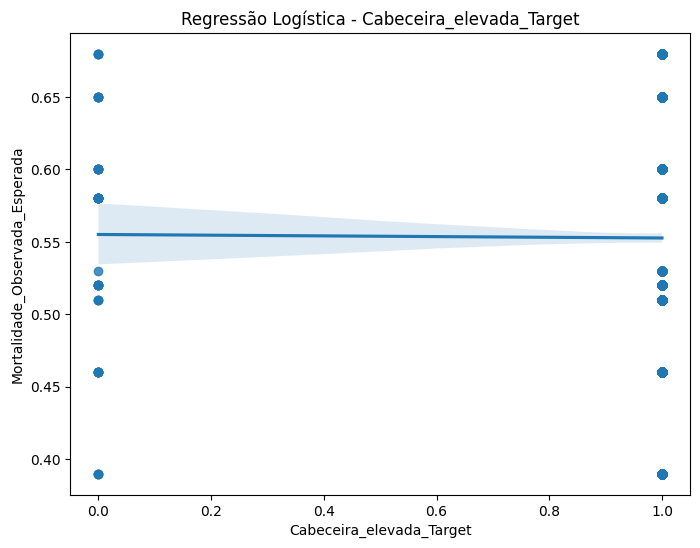

Optimization terminated successfully.
         Current function value: 0.682203
         Iterations 4


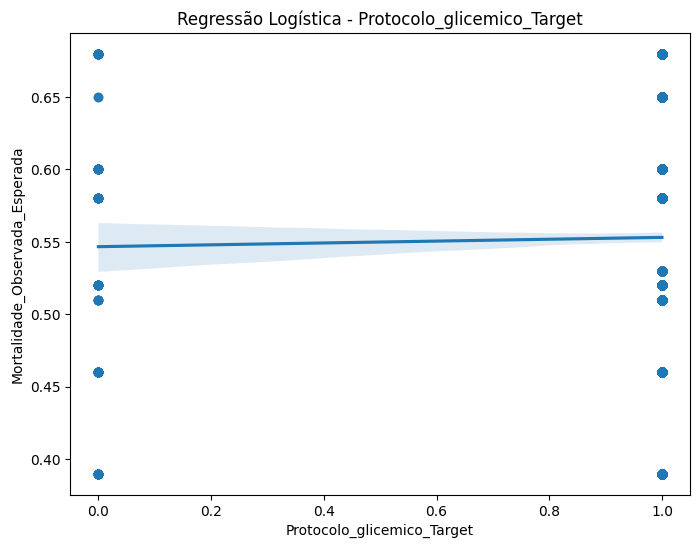

Optimization terminated successfully.
         Current function value: 0.682198
         Iterations 4


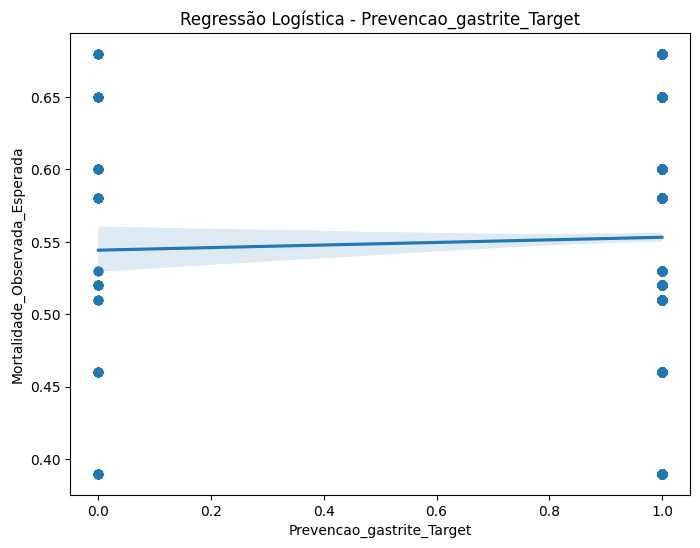

Optimization terminated successfully.
         Current function value: 0.682198
         Iterations 4


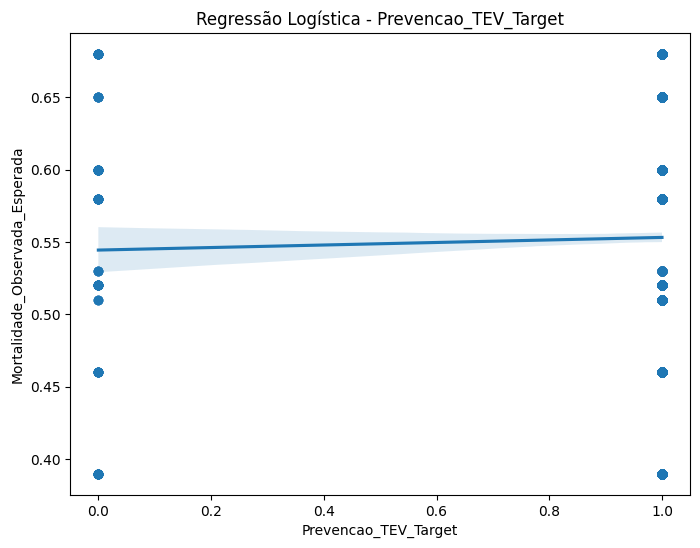

Optimization terminated successfully.
         Current function value: 0.682204
         Iterations 4


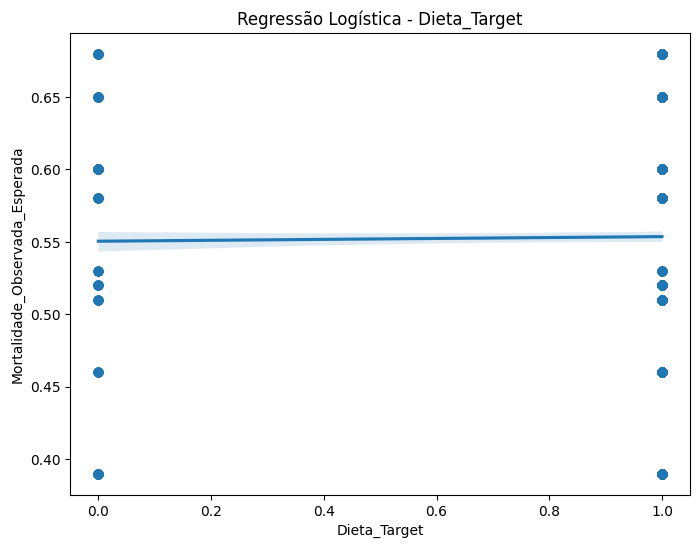

Optimization terminated successfully.
         Current function value: 0.682190
         Iterations 4


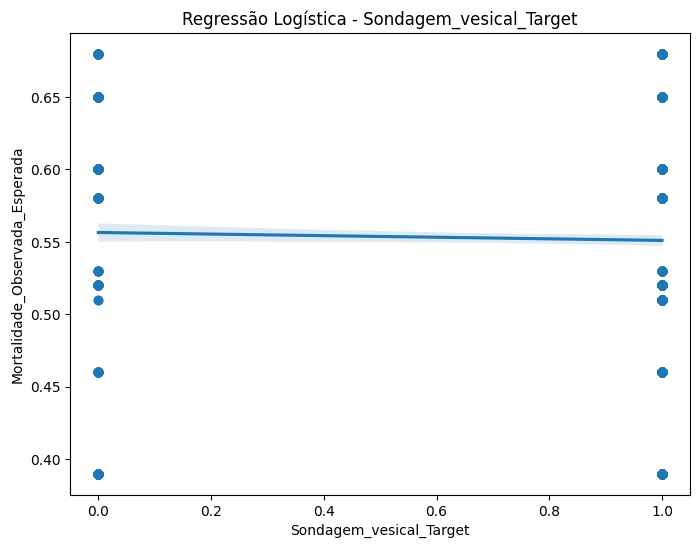

Optimization terminated successfully.
         Current function value: 0.682176
         Iterations 4


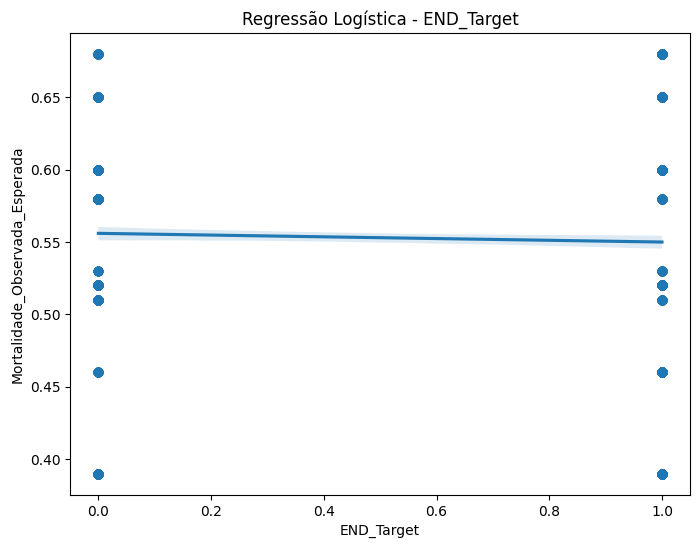

Optimization terminated successfully.
         Current function value: 0.682206
         Iterations 4


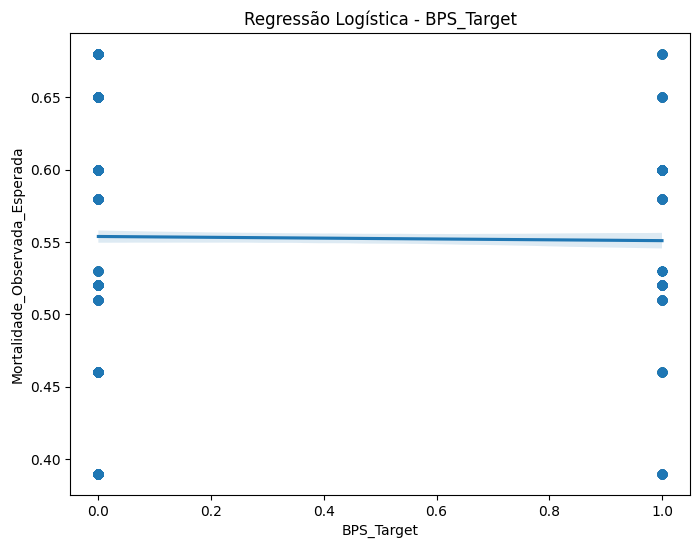

Optimization terminated successfully.
         Current function value: 0.682213
         Iterations 4


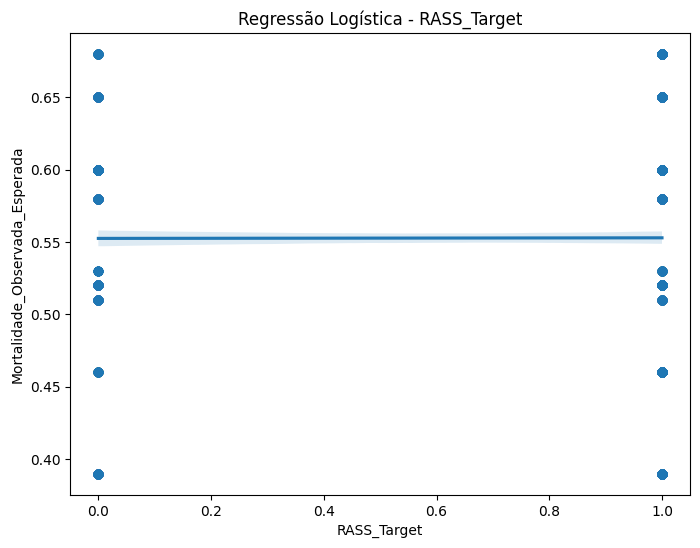

Optimization terminated successfully.
         Current function value: 0.682190
         Iterations 4


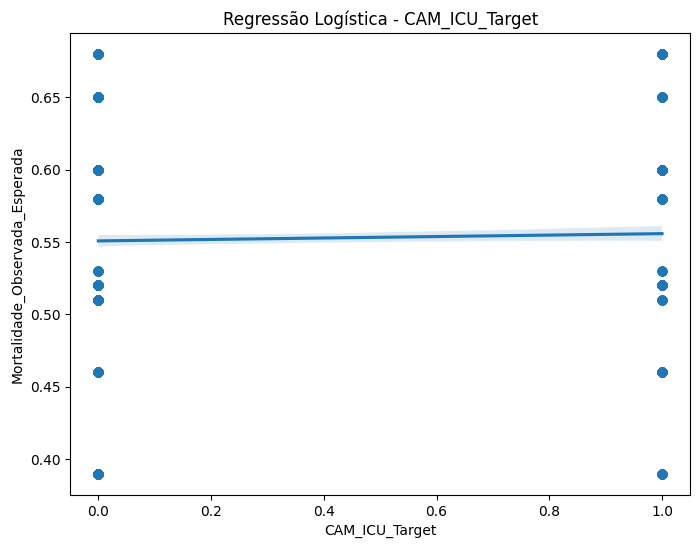

Optimization terminated successfully.
         Current function value: 0.682202
         Iterations 4


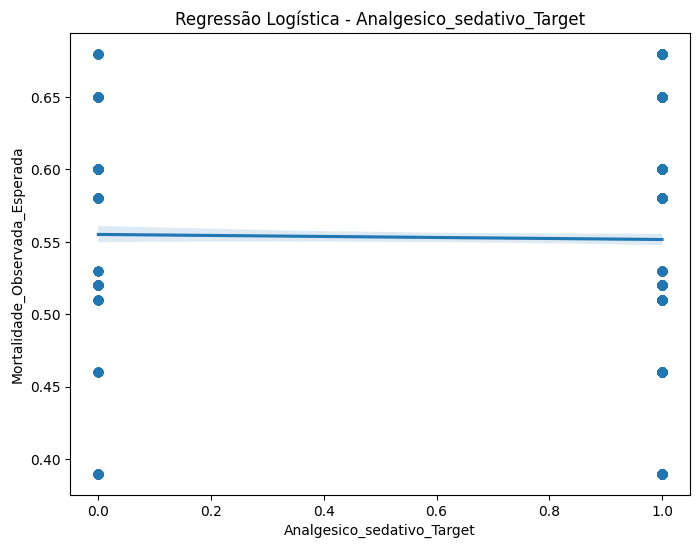

Optimization terminated successfully.
         Current function value: 0.682203
         Iterations 4


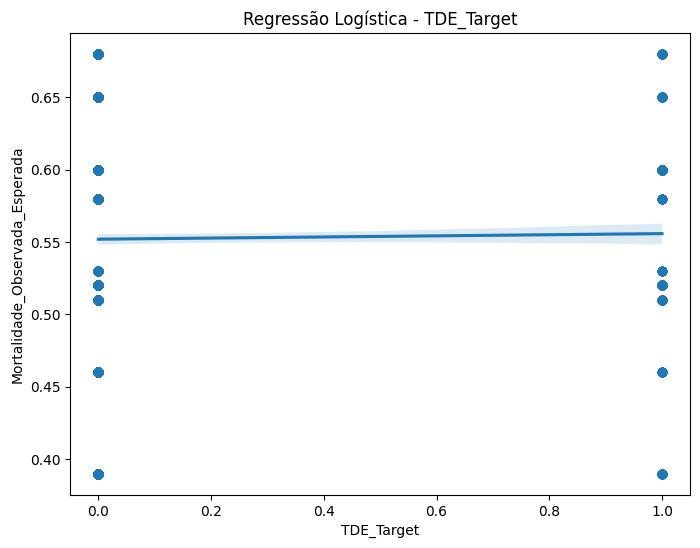

Optimization terminated successfully.
         Current function value: 0.682118
         Iterations 4


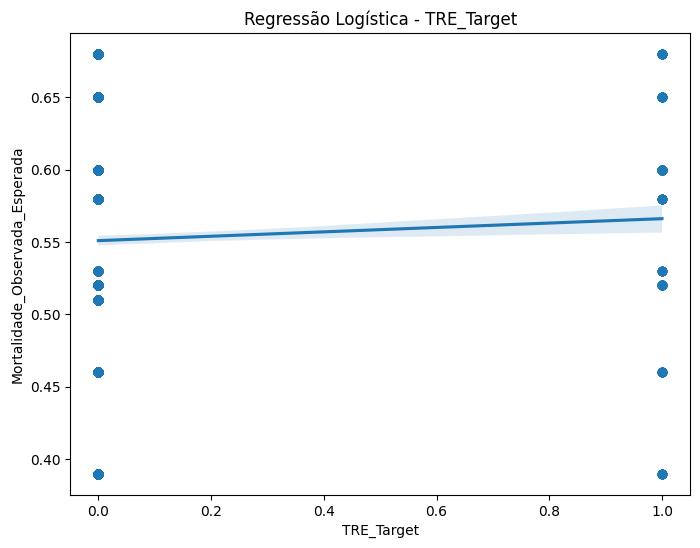

Optimization terminated successfully.
         Current function value: 0.682202
         Iterations 4


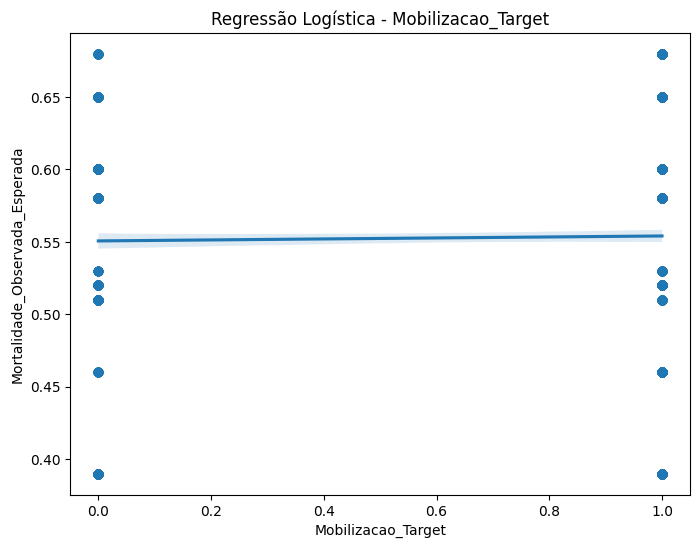

In [115]:
# Show graphs with regression lines for each Input variable

# Get binary input variables from 'Entradas'
binary_input_vars = [col for col in df.columns if col.endswith('_Target')]

# Iterate through each input variable and create a regression plot
for input_var in binary_input_vars:
    # Create formula for logistic regression
    formula = f'Mortalidade_Observada_Esperada ~ {input_var}'

    # Fit the logistic regression model
    model = sm.logit(formula=formula, data=merged_df).fit()

# Show graphs with regression lines for each Input variable

    # Create regression plot using seaborn's regplot
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.regplot(x=input_var, y='Mortalidade_Observada_Esperada', data=merged_df)
    plt.title(f'Regressão Logística - {input_var}')
    plt.xlabel(input_var)
    plt.ylabel('Mortalidade_Observada_Esperada')
    plt.show()

# **Create multivariate logistic regressions and evaluate the best combination of variables and weights of the Input variables for the Outcome variable Observed_Expected_Mortality**

In [ ]:
import itertools # Import the itertools module

# Get binary input variables from 'Entradas'
binary_input_vars = [col for col in df.columns if col.endswith('_Target')]

# Define a function to create and evaluate a model for a given combination of variables
def evaluate_model(variables):
    # Create formula for logistic regression
    formula = 'Mortalidade_Observada_Esperada ~ ' + ' + '.join(variables)

    try:
        # Fit the logistic regression model
        model = sm.logit(formula=formula, data=merged_df).fit()

        # Return model and AIC (or another evaluation metric)
        return model, model.aic
    except Exception as e:
        print(f"Error evaluating model with variables {variables}: {e}")
        return None, float('inf')  # Return infinite AIC for failed models

# Iterate through all possible combinations of variables
best_model = None
best_aic = float('inf')

for i in range(1, len(binary_input_vars) + 1):
    for combination in itertools.combinations(binary_input_vars, i):
        model, aic = evaluate_model(list(combination))

        if model is not None and aic < best_aic:
            best_model = model
            best_aic = aic

# Print the best model summary
if best_model is not None:
    print("Best Model:")
    print(best_model.summary())
    print(f"AIC: {best_aic}")
else:
    print("No suitable model found.")

A saída de streaming foi truncada nas últimas 5000 linhas.
         Current function value: 0.682189
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682171
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682188
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682193
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682105
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682189
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682148
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682158
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682061
         Iterations 4
Optimization terminated successfully.
         Current functi

In [ ]:
# Logistic regression coefficients
intercept = 0.2044
coef_TRE_Target = 0.0616

# Generate x values ​​(TRE_Target)
x = np.linspace(merged_df['TRE_Target'].min(), merged_df['TRE_Target'].max(), 100)

# Calculate the predicted probability using the logistic function
# logit(p) = intercept + coef_TRE_Target * x
# p = 1 / (1 + exp(-logit(p)))

p = 1 / (1 + np.exp(-(intercept + coef_TRE_Target * x)))


# Crie o gráfico
plt.plot(x, p, color='blue', label='Logistic Regression')
plt.scatter(merged_df['TRE_Target'], merged_df['Mortalidade_Observada_Esperada'], color='red', alpha=0.5, label='Observed Data')  # Adicione pontos observados
plt.xlabel('TRE_Target')
plt.ylabel('Probability of Mortality_Observed_Expected')
plt.title('Logistic Regression - TRE_Target vs Observed_Expected_Mortality')
plt.legend()
plt.grid(True)
plt.show()
